In [491]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [448]:
df=pd.read_csv('penguins_size.csv')
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [449]:
df=df1[df1['sex']!='.']
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [450]:
df=df.dropna()

In [451]:
fixing_sex={'sex':{'MALE':0, 'FEMALE':1}}
df.replace(fixing_sex, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5428\517391230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(fixing_sex, inplace=True)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


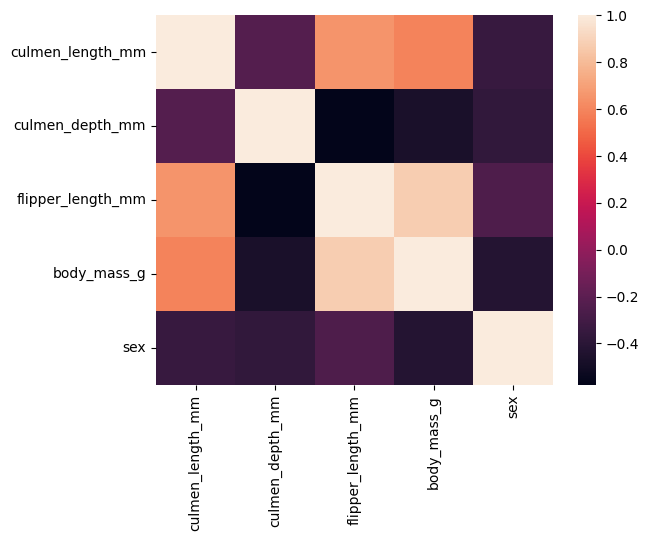

In [452]:
cor = df.select_dtypes(include='number').corr()
cor
sns.heatmap(data=cor, cmap='rocket')
cor
df

# Sex Classification with Logistic Regression

In [453]:
y=df['sex']
X=df.loc[:,df.columns!='sex']

In [454]:
X

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


In [455]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [456]:
# Workflow: make column transformer, fit column transformer, make pipeline, find cross_val score by passing pipeline instead of model

In [457]:
ct=make_column_transformer((StandardScaler(), X.select_dtypes(include='number').columns), (OneHotEncoder(handle_unknown='ignore'),X.select_dtypes(include='object').columns),
                           remainder='passthrough')

In [458]:
ct.fit_transform(X)

array([[-0.89604189,  0.7807321 , -1.42675157, ...,  0.        ,
         0.        ,  1.        ],
       [-0.82278787,  0.11958397, -1.06947358, ...,  0.        ,
         0.        ,  1.        ],
       [-0.67627982,  0.42472926, -0.42637319, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.22108196, -1.20271231,  0.78837197, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.08181673, -0.54156417,  0.85982757, ...,  1.        ,
         0.        ,  0.        ]])

In [459]:
logereg=LogisticRegression(solver='lbfgs')

In [460]:
pl=make_pipeline(ct, logereg)

In [461]:
cross_val_score(pl, X, y, cv=3).mean()

0.8528528528528527

# Species Classification

In [462]:
df.columns
y_encoding = {'species': {'Adelie': 0, 'Chinstrap': 1,'Gentoo':2 }}
df.replace(to_replace=y_encoding, inplace=True)
df

C:\Users\Asus\AppData\Local\Temp\ipykernel_5428\2294346403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace=y_encoding, inplace=True)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,0
1,0,Torgersen,39.5,17.4,186.0,3800.0,1
2,0,Torgersen,40.3,18.0,195.0,3250.0,1
4,0,Torgersen,36.7,19.3,193.0,3450.0,1
5,0,Torgersen,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,2,Biscoe,47.2,13.7,214.0,4925.0,1
340,2,Biscoe,46.8,14.3,215.0,4850.0,1
341,2,Biscoe,50.4,15.7,222.0,5750.0,0
342,2,Biscoe,45.2,14.8,212.0,5200.0,1


In [463]:
y=df['species']
X=df.loc[:,['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]

In [464]:
y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 333, dtype: int64

In [465]:
X

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,0
1,Torgersen,39.5,17.4,186.0,3800.0,1
2,Torgersen,40.3,18.0,195.0,3250.0,1
4,Torgersen,36.7,19.3,193.0,3450.0,1
5,Torgersen,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,1
340,Biscoe,46.8,14.3,215.0,4850.0,1
341,Biscoe,50.4,15.7,222.0,5750.0,0
342,Biscoe,45.2,14.8,212.0,5200.0,1


In [466]:
ct=make_column_transformer((StandardScaler(), X.select_dtypes(include='number').columns), (OneHotEncoder(handle_unknown='ignore'),X.select_dtypes(include='object').columns),
                           remainder='passthrough')

In [467]:
clf = OneVsRestClassifier(SVC())

In [468]:
pl = make_pipeline(ct, clf)

In [469]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [470]:
pl.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['island'], dtype='object'))])),
                ('onevsrestclassifier', OneVsRestClassifier(estimator=SVC()))])

In [471]:
pl.score(X_test, y_test)

0.99

In [472]:
y_predicted=pl.predict(X_test)

In [473]:
cm=confusion_matrix(y_test, y_predicted)

<AxesSubplot: >

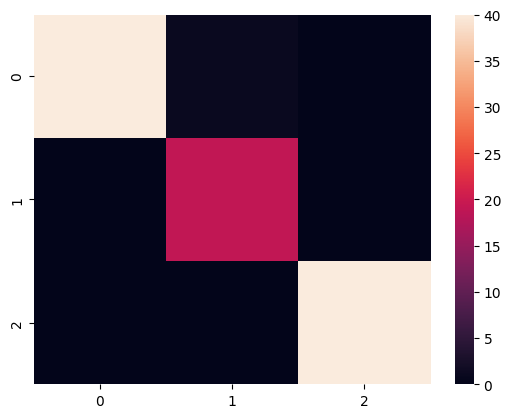

In [474]:
sns.heatmap(cm)

In [475]:
cross_val_score(pl, X, y, cv=3).mean()

0.9969969969969971

# Sex Classification with Decision Tree

In [476]:
y=df['sex']
X=df.loc[:,df.columns!='sex']

In [477]:
ct=make_column_transformer((StandardScaler(), X.select_dtypes(include='number').columns), (OneHotEncoder(handle_unknown='ignore'),X.select_dtypes(include='object').columns),
                           remainder='passthrough')

In [478]:
dt=tree.DecisionTreeClassifier(ccp_alpha=0.0001)

In [479]:
X_train=ct.fit_transform(X)

In [480]:
X_train, X_test, y_train, y_test=train_test_split(X_train, y, test_size=0.3)

In [481]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001)

In [482]:
pl=make_pipeline(ct, dt)

In [483]:
cross_val_score(pl, X, y, cv=3).mean()

0.7657657657657658

[Text(0.3982142857142857, 0.9545454545454546, 'X[4] <= -0.615\ngini = 0.5\nsamples = 233\nvalue = [119, 114]'),
 Text(0.22857142857142856, 0.8636363636363636, 'X[2] <= 0.704\ngini = 0.299\nsamples = 82\nvalue = [15, 67]'),
 Text(0.11428571428571428, 0.7727272727272727, 'X[1] <= 0.688\ngini = 0.063\nsamples = 61\nvalue = [2, 59]'),
 Text(0.05714285714285714, 0.6818181818181818, 'X[1] <= -0.63\ngini = 0.035\nsamples = 56\nvalue = [1, 55]'),
 Text(0.02857142857142857, 0.5909090909090909, 'gini = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(0.08571428571428572, 0.5909090909090909, 'X[1] <= -0.594\ngini = 0.091\nsamples = 21\nvalue = [1, 20]'),
 Text(0.05714285714285714, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.11428571428571428, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.17142857142857143, 0.6818181818181818, 'X[1] <= 0.944\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.14285714285714285, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 

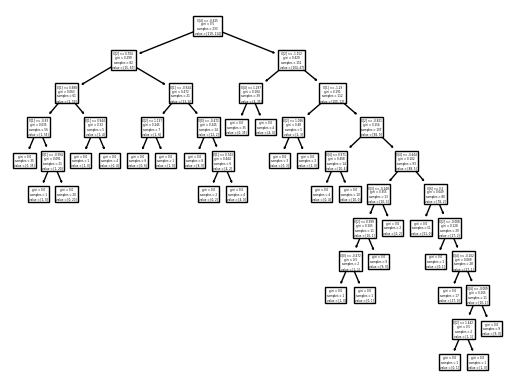

In [484]:
tree.plot_tree(dt)

In [485]:
# Confusion Matrix

In [486]:
y_predicted=dt.predict(X_test)

In [487]:
cm=confusion_matrix(y_test, y_predicted)

In [488]:
dt.score(X_test, y_test)

0.88

<AxesSubplot: >

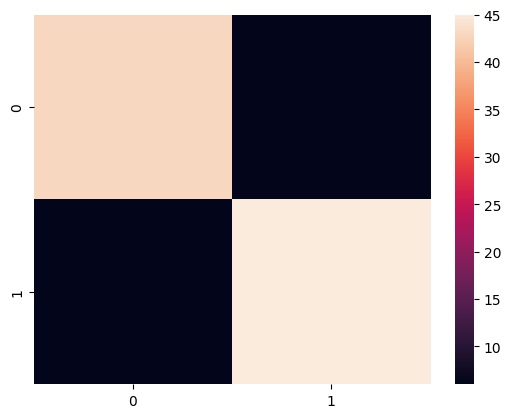

In [489]:
sns.heatmap(cm)

# Sex Classification with Random Forest Classifier

In [533]:
rf = RandomForestClassifier(random_state=0, n_estimators=5) # n_estimators refers to the number of trees

In [534]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [535]:
rf.score(X_test, y_test)

0.89

In [536]:
pl=make_pipeline(ct, rf)

In [537]:
cross_val_score(pl, X, y).mean()

0.8410221619176843